In [2]:
import sys
import snap
import itertools
from IPython.display import Image, display

print("Hello World")


Hello World


In [25]:
def get_nodes_and_edges(my_graph):
    n_nodes = my_graph.GetNodes()
    n_edges = my_graph.GetEdges()
    print(f"The graph has {n_nodes:,d} nodes, {n_edges:,d} edges.")

def show_g(graph, case_name, print_info=True):
    case_txt = case_name+".txt"
    case_png = case_name+".png"
    snap.DrawGViz(graph, snap.gvlDot, case_png, case_name)
    if print_info:
        get_nodes_and_edges(graph)
    return Image(case_png)

In [26]:
# create a directed random graph on X nodes and Y edges
g_er_random = snap.GenRndGnm(snap.PUNGraph, 5, 8)


In [68]:
# traverse the edges
for EI in g_er_random.Edges():
    print("edge (%d, %d)" % (EI.GetSrcNId(), EI.GetDstNId()))

snap.SaveEdgeList(g_er_random, "test_er_random.txt", "Save as tab-separated list of edges")

edge (0, 1)
edge (0, 2)
edge (0, 3)
edge (0, 4)
edge (1, 2)
edge (2, 3)
edge (2, 4)
edge (3, 4)


The graph has 5 nodes, 8 edges.


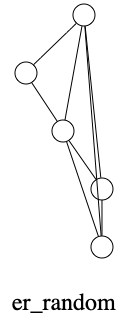

In [27]:
show_g(g_er_random, "er_random")

In [117]:
## https://snap.stanford.edu/snappy/doc/reference/GenSmallWorld.html?highlight=smallworld#GenSmallWorld
Rnd = snap.TRnd(1,0)
g_sw_random = snap.GenSmallWorld(7, 1, 0, Rnd)

The graph has 7 nodes, 7 edges.


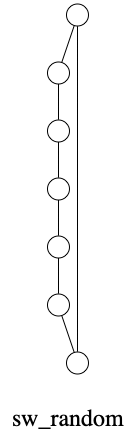

In [118]:
show_g(g_sw_random, "sw_random")

In [128]:
# import numpy as np
# random_pair = np.random.randint(low=0, high=5, size=2)
# print(random_pair)

# random_pair = np.random.choice(6, 2,replace=False) 
# print(random_pair)

In [115]:
import numpy as np

def return_random_edge_pair_set(num_of_node, num_of_rand_edge_pair):
    count = 0
    edge_pair_set = set()
    random_edge_pair_set = set()

    for i in range(num_of_node):
        # print(i)
        edge_pair_set.add((i, (i+1)%num_of_node))
        edge_pair_set.add((i, (i+2)%num_of_node))
    # print(edge_pair_set)
    edge_pair_set.add((0, num_of_node-2))
    edge_pair_set.add((1, num_of_node-1))

    while count < num_of_rand_edge_pair:
        ## add these last two edge pairs

        rand_pair = np.random.choice(num_of_node, 2,replace=False) 
        # print(rand_pair)
        if (rand_pair[0] < rand_pair[1])\
        and (rand_pair[0], rand_pair[1]) not in edge_pair_set:
            edge_pair_set.add((rand_pair[0], rand_pair[1]))
            random_edge_pair_set.add((rand_pair[0], rand_pair[1]))
            count += 1
            # print(count)
    return random_edge_pair_set



In [116]:
return_random_edge_pair_set(7, 2)

{(0, 6), (1, 5)}

The graph has 7 nodes, 9 edges.


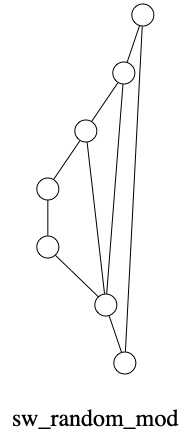

In [126]:
add_edge_pairs = return_random_edge_pair_set(7, 2)
for curr_edge in add_edge_pairs:
    g_sw_random.AddEdge(int(curr_edge[0]), int(curr_edge[1]))
show_g(g_sw_random, "sw_random_mod")